In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_commodity_price_data.csv')

In [3]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display basic statistics
print(data.describe())

                      Date  Commodity_Price  Stock_Index  Interest_Rate  \
count                 8766      8766.000000  8766.000000    8766.000000   
mean   2011-12-31 12:00:00        99.992814  3000.485093       0.049976   
min    2000-01-01 00:00:00        61.633445  2803.879987       0.011436   
25%    2005-12-31 06:00:00        93.232104  2967.070377       0.043174   
50%    2011-12-31 12:00:00        99.962967  3000.753930       0.050004   
75%    2017-12-30 18:00:00       106.790938  3033.799616       0.056714   
max    2023-12-31 00:00:00       139.262377  3223.954213       0.089423   
std                    NaN        10.104965    49.709864       0.009887   

        GDP_Growth  
count  8766.000000  
mean      1.992953  
min      -0.232802  
25%       1.645103  
50%       1.990144  
75%       2.342026  
max       3.863917  
std       0.507915  


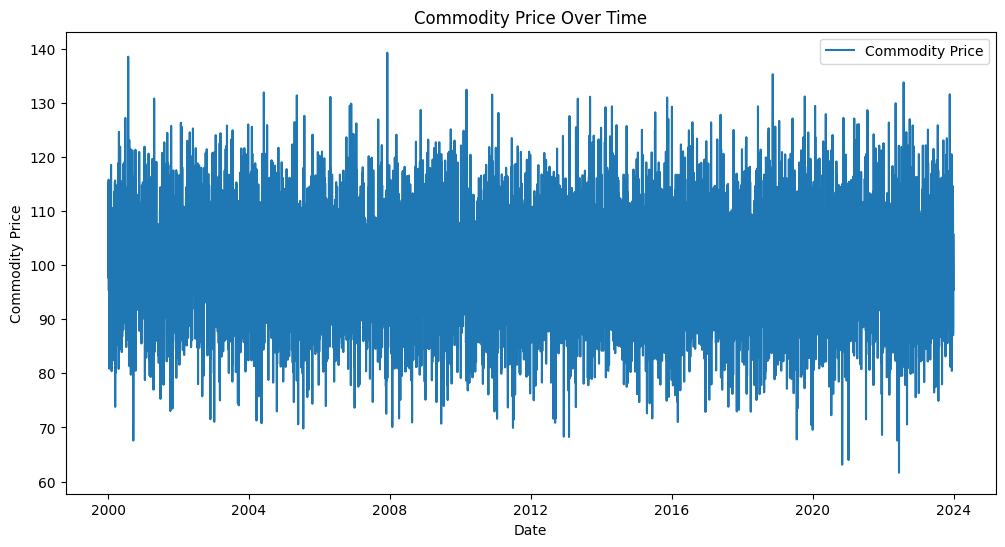

In [4]:
# Plot the commodity price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Commodity_Price'], label='Commodity Price')
plt.xlabel('Date')
plt.ylabel('Commodity Price')
plt.title('Commodity Price Over Time')
plt.legend()
plt.show()

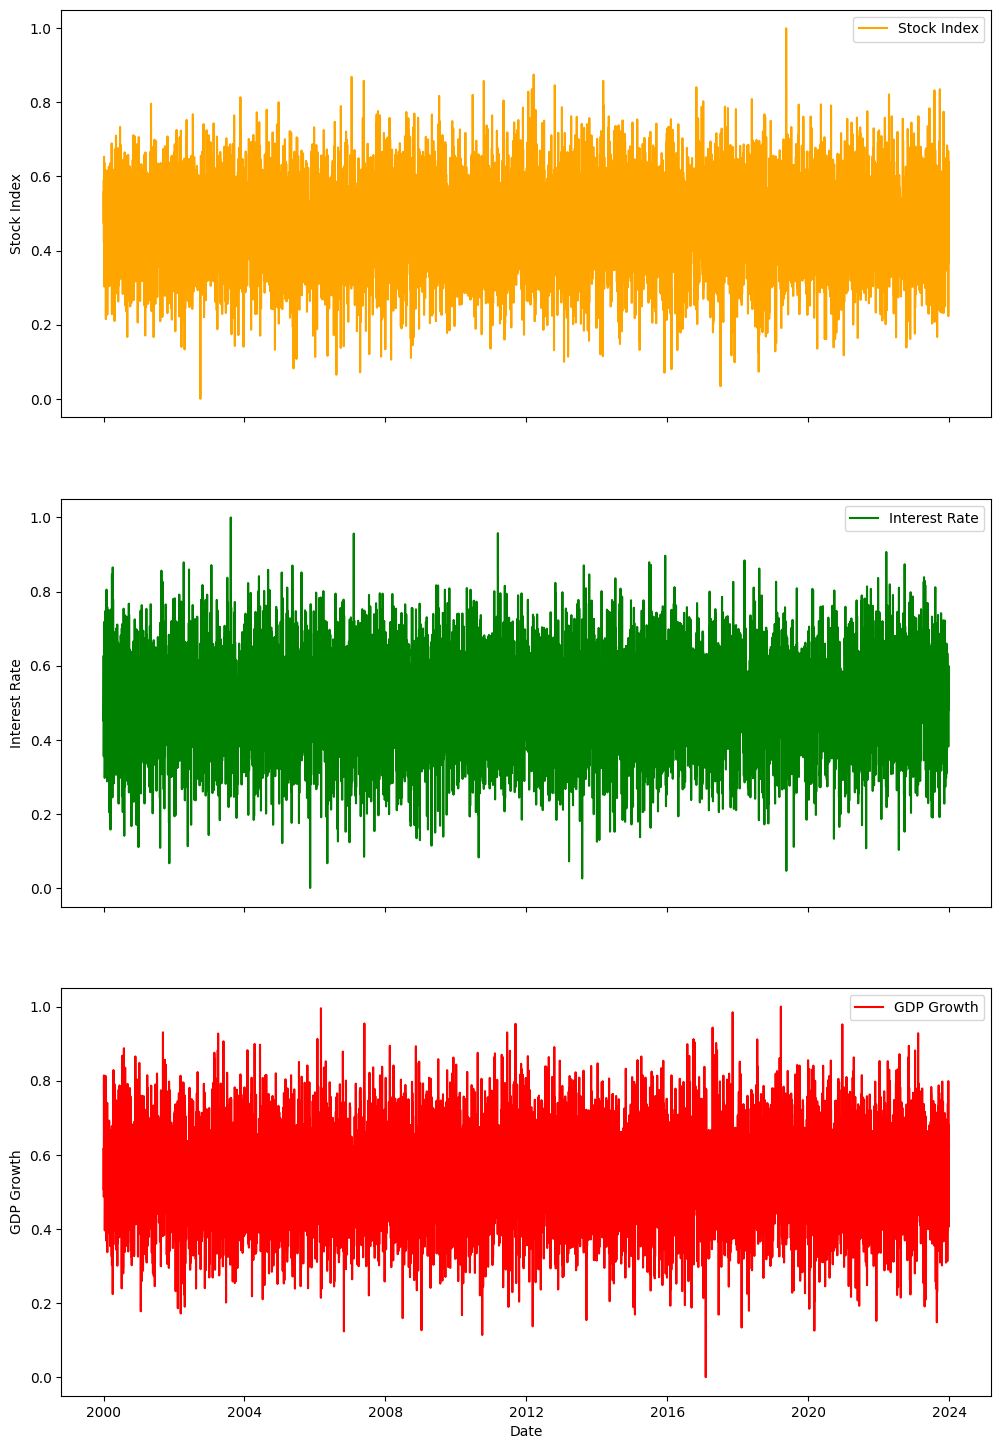

In [12]:
# Plot the other indicators
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
axes[0].plot(data['Date'], data['Stock_Index'], label='Stock Index', color='orange')
axes[0].set_ylabel('Stock Index')
axes[0].legend()

axes[1].plot(data['Date'], data['Interest_Rate'], label='Interest Rate', color='green')
axes[1].set_ylabel('Interest Rate')
axes[1].legend()

axes[2].plot(data['Date'], data['GDP_Growth'], label='GDP Growth', color='red')
axes[2].set_ylabel('GDP Growth')
axes[2].legend()

plt.xlabel('Date')
plt.show()

In [8]:
# Select the features and target
features = ['Stock_Index', 'Interest_Rate', 'GDP_Growth']
target = 'Commodity_Price'

# Normalize the features and target
scaler = MinMaxScaler()
data[features + [target]] = scaler.fit_transform(data[features + [target]])

# Prepare the data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, :-1]
        label = data[i + seq_length, -1]
        sequences.append((seq, label))
    return sequences

seq_length = 60  # Sequence length of 60 days
sequences = create_sequences(data[features + [target]].values, seq_length)

# Split the data into training and testing sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

# Separate features and labels
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    LSTM(50),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_loss}")


Epoch 1/20
175/175 [==============================] - 15s 63ms/step - loss: 0.0216 - val_loss: 0.0182
Epoch 2/20
175/175 [==============================] - 11s 60ms/step - loss: 0.0170 - val_loss: 0.0181
Epoch 3/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0168 - val_loss: 0.0179
Epoch 4/20
175/175 [==============================] - 10s 58ms/step - loss: 0.0169 - val_loss: 0.0181
Epoch 5/20
175/175 [==============================] - 9s 53ms/step - loss: 0.0169 - val_loss: 0.0178
Epoch 6/20
175/175 [==============================] - 10s 60ms/step - loss: 0.0167 - val_loss: 0.0185
Epoch 7/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0170 - val_loss: 0.0178
Epoch 8/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0166 - val_loss: 0.0179
Epoch 9/20
175/175 [==============================] - 9s 50ms/step - loss: 0.0167 - val_loss: 0.0178
Epoch 10/20
175/175 [==============================] - 10s 58ms/step - loss: 0.0167 

In [10]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, len(features))),
    GRU(50),
    Dense(1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
gru_loss = gru_model.evaluate(X_test, y_test)
print(f"GRU Test Loss: {gru_loss}")


Epoch 1/20
175/175 [==============================] - 15s 64ms/step - loss: 0.0206 - val_loss: 0.0182
Epoch 2/20
175/175 [==============================] - 10s 58ms/step - loss: 0.0170 - val_loss: 0.0180
Epoch 3/20
175/175 [==============================] - 11s 61ms/step - loss: 0.0170 - val_loss: 0.0184
Epoch 4/20
175/175 [==============================] - 10s 58ms/step - loss: 0.0169 - val_loss: 0.0180
Epoch 5/20
175/175 [==============================] - 9s 53ms/step - loss: 0.0170 - val_loss: 0.0179
Epoch 6/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0168 - val_loss: 0.0189
Epoch 7/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0168 - val_loss: 0.0178
Epoch 8/20
175/175 [==============================] - 10s 59ms/step - loss: 0.0168 - val_loss: 0.0178
Epoch 9/20
175/175 [==============================] - 9s 52ms/step - loss: 0.0168 - val_loss: 0.0180
Epoch 10/20
175/175 [==============================] - 11s 61ms/step - loss: 0.0167 

In [11]:
from tensorflow.keras.layers import Bidirectional

# Build the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, len(features))),
    Bidirectional(LSTM(50)),
    Dense(1)
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
bilstm_loss = bilstm_model.evaluate(X_test, y_test)
print(f"BiLSTM Test Loss: {bilstm_loss}")


Epoch 1/20
175/175 [==============================] - 30s 118ms/step - loss: 0.0200 - val_loss: 0.0190
Epoch 2/20
175/175 [==============================] - 20s 112ms/step - loss: 0.0168 - val_loss: 0.0180
Epoch 3/20
175/175 [==============================] - 18s 105ms/step - loss: 0.0170 - val_loss: 0.0185
Epoch 4/20
175/175 [==============================] - 19s 107ms/step - loss: 0.0169 - val_loss: 0.0179
Epoch 5/20
175/175 [==============================] - 20s 112ms/step - loss: 0.0167 - val_loss: 0.0178
Epoch 6/20
175/175 [==============================] - 18s 104ms/step - loss: 0.0168 - val_loss: 0.0194
Epoch 7/20
175/175 [==============================] - 20s 112ms/step - loss: 0.0167 - val_loss: 0.0178
Epoch 8/20
175/175 [==============================] - 18s 103ms/step - loss: 0.0167 - val_loss: 0.0183
Epoch 9/20
175/175 [==============================] - 20s 112ms/step - loss: 0.0167 - val_loss: 0.0186
Epoch 10/20
175/175 [==============================] - 19s 110ms/step - l